# Multilabel Classification

In multi-label classification, each sample can have multiple labels associated with it, as opposed to the traditional single-label classification where each sample can have only one label associated with it. <br/>

This means that the output of a multi-label classifier is an array of probabilities, one for each label, indicating the probability of the input sample belonging to each label.

# Setting Up

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.9/518.9 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ml-classifier

/content/drive/MyDrive/ml-classifier


# Data

In [ ]:
df = pd.read_csv("book_details_with_50colors.csv")
df.head()

,title,description,top_genres,colors
0,Awakening Your Money Chakras Secrets to Attracting Wealth and Success,"Welcome to our enlightening guide on ""Awakening Your Money Chakras: Secrets to Attracting Wealth and Success."" If you've ever wondered how some people effortlessly attract abundance into their lives while others struggle, this book has the answers you seek!\n\nIn this empowering read, we delve into the fascinating world of chakras, the energy centers within us that influence our financial well-being. From the Root Chakra to the Crown Chakra, we explore how each one impacts our money mindset and ability to manifest prosperity.\n\nLearn how to identify blockages and imbalances that may have ...","["" 'Nonfiction'"", "" 'Business & Economics'"", "" 'New Age'"", "" 'Meditation'"", "" 'Personal finance / money management'"", "" 'Religion & Spirituality'"", "" 'Body"", ' mind', "" & spirit'"", "" 'Inspiration & personal growth'""]","['firebrick', 'mediumseagreen', 'darkviolet', 'magenta', 'mediumblue', 'limegreen', 'seagreen', 'tomato', 'blue', 'silver']"
1,Emotions A to Z,"""The Empathy Weave: Embracing Emotional Intelligence for Meaningful Connections"" is a captivating and transformative exploration of emotional intelligence and empathy—a tapestry of understanding and compassion that weaves hearts together with profound human connections. In this enlightening book, readers embark on a journey of self-discovery and growth, unlocking the power of emotional intelligence to enhance personal relationships, professional success, and overall well-being.\n\nDrawing upon the rich tapestry of emotional intelligence, this book delves deep into the intricacies of self-a...","["" 'Nonfiction'"", "" 'Inspiration'"", "" 'General self-help'"", "" 'Self-improvement'"", "" 'Anxieties & Phobias'"", ""['Nonfiction'"", "" 'Anxieties & Phobias']""]","['firebrick', 'teal', 'mediumslateblue', 'darkturquoise', 'salmon', 'blue', 'crimson']"
2,The Art of Raise Capital for a New Venture,"""The Art of Raise Capital for Your New Venture"" is a practical and insightful guide that equips entrepreneurs with the knowledge and strategies needed to secure capital for their startup ventures. Authored with the understanding of the challenges faced by startup founders, this book serves as a valuable resource for aspiring entrepreneurs and seasoned founders alike.\n\nAt the core of successful fundraising lies the art of visionary storytelling. The book emphasizes the importance of articulating a powerful vision that resonates with potential investors. Through effective communication, en...","["" 'Business & Economics'"", "" 'Nonfiction'"", "" 'Starting up'"", "" 'Budgeting'"", ""['Nonfiction'"", "" 'Budgeting']""]","['mediumseagreen', 'firebrick', 'cyan', 'teal', 'blue', 'slategrey']"
3,райдуга навколо сонця,"Життя заможного бізнесмена Марка можна побачити лише у казках: квартири, дорогі автомобілі, красива дівчина. Проте одна подія змінює Марка: врятувавши дівчинку з полум'я та сам ледь не загинувши, він полишає все та вирішує піти у паломництво до Єрусалиму у пошуках відповідей на свої запитання. Шлях далекий та складний, сповнений пригод та небезпек. Але Марк впевнений, що там, біля Гробу Господнього, на нього чекає відповідь на найбільшу таємницю.","["" 'Adventure'"", "" 'Fiction'"", "" 'General'"", "" 'Travel'"", ""['Fiction'"", "" 'Travel']""]","['salmon', 'slategrey', 'gold', 'darkviolet', 'cadetblue', 'indianred']"
4,Sibiloi: The Genesis of Humanity?,"ONE Mysterious belt in an antique shop in London is a compass to secret caves of the Amalek tribe in Sibiloi, Northern Kenya.\n\nFOUR Researchers want to unravel the truth: biologist Dr Martha Watkins, anthropologist Jim Trevor, and archeologists Dr Paul Brando from California, US, and Professor Simiyu from Kenya.\n\nTWO Extremist organisations want the truth buried forever: a religious sect and a terror organisation.\n\nDeep in the caves of Sibiloi in Turkana, Kenya, is the answer that has evaded resear

In [ ]:
df.shape

(21204, 4)

In [ ]:
df = df.dropna().reset_index(drop=True)
df.shape

(21204, 4)

In [ ]:
colors_list = df.colors.to_list()
color_count = {}
for colors in colors_list:
  color_list = eval(colors)
  for color in color_list:
    if color in color_count.keys():
      color_count[color] += 1
    else:
      color_count[color] = 1
print(f"Total number of colors for the total 7575 genres in the top_genres column: {len(color_count)}")
print(color_count)

Total number of colors for the total 7575 genres in the top_genres column: 58
{'firebrick': 20592, 'mediumseagreen': 3674, 'darkviolet': 3306, 'magenta': 1827, 'mediumblue': 1402, 'limegreen': 4004, 'seagreen': 3068, 'tomato': 1973, 'blue': 14904, 'silver': 1257, 'teal': 1985, 'mediumslateblue': 2084, 'darkturquoise': 2408, 'salmon': 1668, 'crimson': 3066, 'cyan': 2643, 'slategrey': 4392, 'gold': 5111, 'cadetblue': 4252, 'indianred': 1177, 'saddlebrown': 1962, 'orangered': 3508, 'yellow': 5030, 'darkgoldenrod': 3043, 'orange': 915, 'mediumspringgreen': 1599, 'olive': 1505, 'darkorange': 2608, 'lavender': 1873, 'rosybrown': 1853, 'brown': 3034, 'pink': 2404, 'orchid': 1831, 'navy': 2251, 'indigo': 1944, 'royalblue': 2471, 'mediumvioletred': 2116, 'red': 3054, 'steelblue': 2618, 'deeppink': 2620, 'darkkhaki': 3061, 'palevioletred': 1290, 'chocolate': 1534, 'green': 2283, 'slateblue': 1418, 'coral': 1250, 'mediumorchid': 1480, 'turquoise': 1874, 'purple': 3674, 'lime': 2911, 'darkcyan': 1

In [ ]:
threshold = int(len(df) * 0.01)
rare_colors = [key for key, value in color_count.items() if value < threshold]
len(rare_colors), rare_colors[:5]

(0, [])

In [ ]:
colors_list = df.colors.to_list()
revised_color_list = []
indices_to_drop = []

for idx, colors in enumerate(colors_list):
  color_list = eval(colors)
  revised_colors = []

  for color in color_list:
    if color not in rare_colors:
      revised_colors.append(color)

  if len(revised_colors) == 0:
    indices_to_drop.append(idx)
  else:
    revised_color_list.append(revised_colors)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(21204, 4)

In [ ]:
df['revised_colors'] = revised_color_list

In [ ]:
df.tail()

,title,description,top_genres,colors,revised_colors
21199,Annie John,"The essential coming-of-age novel by Jamaica Kincaid, Annie John is a haunting and provocative story of a young girl growing up on the island of Antigua. Kincaid's novel focuses on a universal, tragic, and often comic theme: the loss of childhood. Annie's voice—urgent, demanding to be heard—is one that will not soon be forgotten by readers.\n\nAn adored only child, Annie has until recently lived an idyllic life. She is inseparable from her beautiful mother, a powerful presence, who is the very center of the little girl's existence. Loved and cherished, Annie grows and thrives within her mo...","[""['Fiction'"", "" 'Literary'"", "" 'English literature'"", "" 'American and Canadian literature']""]","['cadetblue', 'peru', 'orchid', 'saddlebrown']","[cadetblue, peru, orchid, saddlebrown]"
21200,Cancer Ward,"Cancer Ward examines the relationship of a group of people in the cancer ward of a provincial Soviet hospital in 1955, two years after Stalin's death. We see them under normal circumstances, and also reexamined at the eleventh hour of illness. Together they represent a remarkable cross-section of contemporary Russian characters and attitudes. The experiences of the central character, Oleg Kostoglotov, closely reflect the author's own: Solzhenitsyn himself became a patient in a cancer ward in the mid-1950s, on his release from a labor camp, and later recovered. Translated by Nicholas Bethel...","[""['Fiction'"", "" 'Literary'"", "" 'Slavic literature']""]","['cadetblue', 'peru', 'mediumseagreen']","[cadetblue, peru, mediumseagreen]"
21201,The Resuscitation of a Hanged Man,"Resuscitation of a Hanged Man is Denis Johnson's most fully realized novel to date, an enthralling and shattering reading experience, which probes the mysteries of faith, hope and love.","[""['Fiction'"", "" 'Literary'"", "" 'English literature'"", "" 'American and Canadian literature']""]","['cadetblue', 'peru', 'orchid', 'saddlebrown']","[cadetblue, peru, orchid, saddlebrown]"
21202,The Complete Stories,"Winner of the National Book Award\n\nThe publication of this extraordinary volume firmly established Flannery O'Connor's monumental contribution to American fiction.\n\nThere are thirty-one stories here in all, including twelve that do not appear in the only two story collections O'Connor put together in her short lifetime--Everything That Rises Must Converge and A Good Man Is Hard to Find.\n\nO'Connor published her first story, ""The Geranium,"" in 1946, while she was working on her master's degree at the University of Iowa. Arranged chronologically, this collection shows that her last stor...","[""['Fiction'"", "" 'Short stories'"", "" 'English literature'"", "" 'American and Canadian literature']""]","['cadetblue', 'mediumseagreen', 'orchid', 'saddlebrown']","[cadetblue, mediumseagreen, orchid, saddlebrown]"
21203,Everything That Rises Must Converge,"Flannery O'Connor was working on Everything That Rises Must Converge at the time of her death. This collection is an exquisite legacy from a genius of the American short story, in which she scrutinizes territory familiar to her readers: race, faith, and morality. The stories encompass the comic and the tragic, the beautiful and the grotesque; each carries her highly individual stamp and could have been written by no one else.","[""['Fiction'"", "" 'Short stories'"", "" 'English literature'"", "" 'American and Canadian literature']""]","['cadetblue', 'mediumseagreen', 'orchid', 'saddlebrown']","[cadetblue, mediumseagreen, orchid, saddlebrown]"


In [ ]:
revised_colors_list = df.revised_colors.to_list()
revised_color_count = {}
for colors in revised_colors_list:
  color_list = colors
  for color in color_list:
    if color in revised_color_count.keys():
      revised_color_count[color] += 1
    else:
      revised_color_count[color] = 1
print(f"Number of genre-colors: {len(revised_color_count)}")
print(revised_color_count)

Number of genre-colors: 58
{'firebrick': 20592, 'mediumseagreen': 3674, 'darkviolet': 3306, 'magenta': 1827, 'mediumblue': 1402, 'limegreen': 4004, 'seagreen': 3068, 'tomato': 1973, 'blue': 14904, 'silver': 1257, 'teal': 1985, 'mediumslateblue': 2084, 'darkturquoise': 2408, 'salmon': 1668, 'crimson': 3066, 'cyan': 2643, 'slategrey': 4392, 'gold': 5111, 'cadetblue': 4252, 'indianred': 1177, 'saddlebrown': 1962, 'orangered': 3508, 'yellow': 5030, 'darkgoldenrod': 3043, 'orange': 915, 'mediumspringgreen': 1599, 'olive': 1505, 'darkorange': 2608, 'lavender': 1873, 'rosybrown': 1853, 'brown': 3034, 'pink': 2404, 'orchid': 1831, 'navy': 2251, 'indigo': 1944, 'royalblue': 2471, 'mediumvioletred': 2116, 'red': 3054, 'steelblue': 2618, 'deeppink': 2620, 'darkkhaki': 3061, 'palevioletred': 1290, 'chocolate': 1534, 'green': 2283, 'slateblue': 1418, 'coral': 1250, 'mediumorchid': 1480, 'turquoise': 1874, 'purple': 3674, 'lime': 2911, 'darkcyan': 1576, 'peru': 2826, 'sienna': 1134, 'deepskyblue': 1

In [ ]:
encode_color_types = { key: idx for idx, (key, value) in enumerate(revised_color_count.items())}
with open("color_types_encoded50.json", "w") as fp:
  json.dump(encode_color_types, fp)

In [ ]:
# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_color_list = []
revised_colors_list = df.revised_colors.to_list()

for revised_colors in revised_colors_list:
  categorical_list = [0] * len(encode_color_types)
  for color in revised_colors:
    color_type_index = encode_color_types[color]
    categorical_list[color_type_index] = 1
  categorical_color_list.append(categorical_list)

categorical_color_list[3][:23]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0]

In [ ]:
df['color_cat_list'] = categorical_color_list
df.head()

,title,description,top_genres,colors,revised_colors,color_cat_list
0,Awakening Your Money Chakras Secrets to Attracting Wealth and Success,"Welcome to our enlightening guide on ""Awakening Your Money Chakras: Secrets to Attracting Wealth and Success."" If you've ever wondered how some people effortlessly attract abundance into their lives while others struggle, this book has the answers you seek!\n\nIn this empowering read, we delve into the fascinating world of chakras, the energy centers within us that influence our financial well-being. From the Root Chakra to the Crown Chakra, we explore how each one impacts our money mindset and ability to manifest prosperity.\n\nLearn how to identify blockages and imbalances that may have ...","["" 'Nonfiction'"", "" 'Business & Economics'"", "" 'New Age'"", "" 'Meditation'"", "" 'Personal finance / money management'"", "" 'Religion & Spirituality'"", "" 'Body"", ' mind', "" & spirit'"", "" 'Inspiration & personal growth'""]","['firebrick', 'mediumseagreen', 'darkviolet', 'magenta', 'mediumblue', 'limegreen', 'seagreen', 'tomato', 'blue', 'silver']","[firebrick, mediumseagreen, darkviolet, magenta, mediumblue, limegreen, seagreen, tomato, blue, silver]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Emotions A to Z,"""The Empathy Weave: Embracing Emotional Intelligence for Meaningful Connections"" is a captivating and transformative exploration of emotional intelligence and empathy—a tapestry of understanding and compassion that weaves hearts together with profound human connections. In this enlightening book, readers embark on a journey of self-discovery and growth, unlocking the power of emotional intelligence to enhance personal relationships, professional success, and overall well-being.\n\nDrawing upon the rich tapestry of emotional intelligence, this book delves deep into the intricacies of self-a...","["" 'Nonfiction'"", "" 'Inspiration'"", "" 'General self-help'"", "" 'Self-improvement'"", "" 'Anxieties & Phobias'"", ""['Nonfiction'"", "" 'Anxieties & Phobias']""]","['firebrick', 'teal', 'mediumslateblue', 'darkturquoise', 'salmon', 'blue', 'crimson']","[firebrick, teal, mediumslateblue, darkturquoise, salmon, blue, crimson]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,The Art of Raise Capital for a New Venture,"""The Art of Raise Capital for Your New Venture"" is a practical and insightful guide that equips entrepreneurs with the knowledge and strategies needed to secure capital for their startup ventures. Authored with the understanding of the challenges faced by startup founders, this book serves as a valuable resource for aspiring entrepreneurs and seasoned founders alike.\n\nAt the core of successful fundraising lies the art of visionary storytelling. The book emphasizes the importance of articulating a powerful vision that resonates with potential investors. Through effective communication, en...","["" 'Business & Economics'"", "" 'Nonfiction'"", "" 'Starting up'"", "" 'Budgeting'"", ""['Nonfiction'"", "" 'Budgeting']""]","['mediumseagreen', 'firebrick', 'cyan', 'teal', 'blue', 'slategrey']","[mediumseagreen, firebrick, cyan, teal, blue, slategrey]","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,райдуга навколо сонця,"Життя заможного бізнесмена Марка можна побачити лише у казках: квартири, дорогі автомобілі, красива дівчина. Проте одна подія змінює Марка: врятувавши дівчинку з полум'я та сам ледь не загинувши, він полишає все та вирішує піти у паломництво до Єрусалиму у пошуках відповідей на свої запитання. Шлях далекий та складний, сповнений пригод та небезпек. Але Марк впевнений, 

# Dataloaders and Modeling

In [ ]:
labels = list(encode_color_types.keys())

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('color_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls-rainbow-genre-cover-ml-classifier50.pkl")

In [ ]:
# dls = torch.load("dataloaders/dls-multilabel-book-classifier.pkl")

In [ ]:
dls.vocab

['firebrick', 'mediumseagreen', 'darkviolet', 'magenta', 'mediumblue', 'limegreen', 'seagreen', 'tomato', 'blue', 'silver', 'teal', 'mediumslateblue', 'darkturquoise', 'salmon', 'crimson', 'cyan', 'slategrey', 'gold', 'cadetblue', 'indianred', 'saddlebrown', 'orangered', 'yellow', 'darkgoldenrod', 'orange', 'mediumspringgreen', 'olive', 'darkorange', 'lavender', 'rosybrown', 'brown', 'pink', 'orchid', 'navy', 'indigo', 'royalblue', 'mediumvioletred', 'red', 'steelblue', 'deeppink', 'darkkhaki', 'palevioletred', 'chocolate', 'green', 'slateblue', 'coral', 'mediumorchid', 'turquoise', 'purple', 'lime', 'darkcyan', 'peru', 'sienna', 'deepskyblue', 'maroon', 'forestgreen', 'darkslategray', 'dodgerblue']

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,২০০৫ সালে ময়মনসিঙহ মেডিক্যাল কলেজের ছাত্র মেহদি হাসান খান ও তার বন্ধুদের প্রতিষ্ঠান অমিক্রণ ল্যাব অভ্র বাংলা টাইপিং সফটওয়্যারের মাধ্যমে বাংলা ভাষা অনলাইনে উন্মুক্ত করেন। অভ্রর ইউনিকোড শক্তিতে খুলে যায় বাংলা ভাষায় সৃষ্টিশীলতার অবারিত সম্ভবনার দুয়ার�,"[firebrick, limegreen, seagreen, tomato, blue, orange, indigo, royalblue, darkkhaki, mediumorchid]"
1,"В молодой семье родился ребёнок. Это огромная радость и счастье родителям. Хорошо, когда папа и мама в ребёнке души не чают. Но в жизни разных людей не всё одинаково складывается. Бывает так, что с рождением ребёнка на почве зарождающихся сомнений мнительный папаша утверждает: «Ну не похож на меня-и всё!», и история с рождением первенца принимает скандальный оборот вплоть до обвинений в измене. И здесь без проведения генетической экспертизы не обойтись! \n Да,","[cyan, olive, red, lime]"
2,માનવતા ચેતનાના પ્રથમ વિકાસથી સમજી ગઈ છે કે કેટલીક મહત્વપૂર્ણ ઘટનાઓ તકને કારણે નથી. ન સમજાય તેવી ઘટનાઓ ઉચ્ચ દાર્શનિક અથવા દૈવી સ્તરના સંકેતો છે. આ બુદ્ધિ માનવ અંતઃકરણ સાથે વાતચીત કરવા માંગે છે.\n\nક,"[firebrick, blue, darkturquoise, yellow, royalblue, chocolate, turquoise, sienna]"
3,गायन वादन एवं नृत्य इन तीनों कलाओं के समावेश को संगीतज्ञों ने संगीत कहा है। संगीत एक ललित कला है। जिसे अन्य ललित कलाओं में सर्वश्रेष्ठ स्थान प्राप्त है। संगीत मन के भावों को प्रकट करने का सबसे अच्छा साधन माना जाता है। संगीत कला मुख्य रूप से प्रयोगात्मक कला है। जिसका उद्देश्य मन के भावों को बड़ी सहजता और मधुर ढंग से परिमार्जित कर उ,"[firebrick, blue, silver, cyan, gold, pink, deeppink, darkkhaki, slateblue, turquoise]"


In [ ]:
doc(accuracy_multi)

In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

# Stage - 0

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.002511886414140463, valley=9.999999747378752e-06)

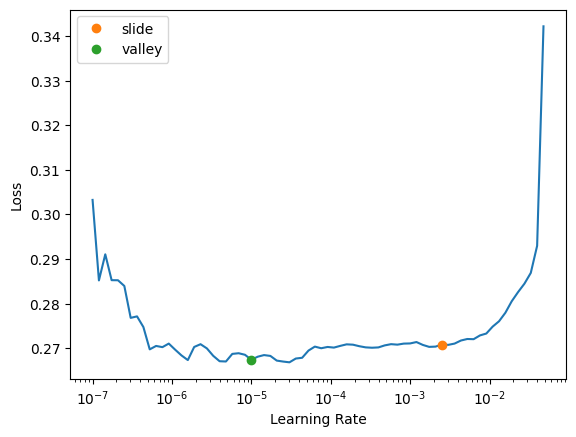

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(6,2.73e-5)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.269278,0.292663,0.863037,03:21
1,0.272292,0.292315,0.862801,03:23
2,0.267617,0.292101,0.863256,03:22
3,0.271310,0.291755,0.863232,03:21
4,0.268951,0.292089,0.862134,03:24
5,0.268869,0.292105,0.862224,03:20


In [ ]:
learner.save("rainbow-genre-cover-classifier-stage-00")

Path('models/rainbow-genre-cover-classifier-stage-00.pth')

In [ ]:
learner.export("models/rainbow-genre-cover-classifier-stage-00.pkl")

# Stage - 1

In [ ]:
# learner.load("book-classifier-stage-0")

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.0014454397605732083, valley=2.0892961401841603e-05)

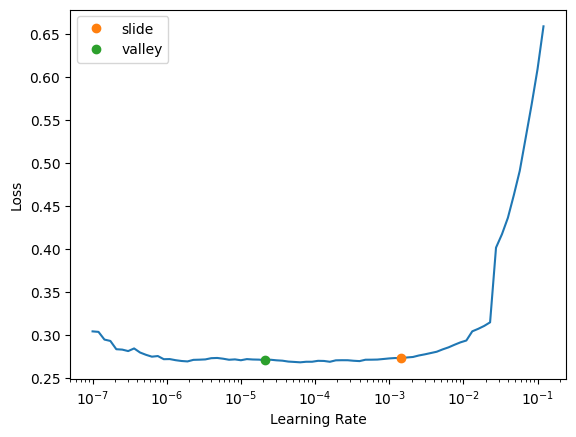

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(9,slice(2.8e-4, 2.7e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.266582,0.282549,0.870885,03:40
1,0.249498,0.274961,0.871576,03:40
2,0.230604,0.258963,0.871722,03:39
3,0.206663,0.252315,0.875960,03:39
4,0.189388,0.246209,0.888069,03:39
5,0.172620,0.243560,0.885020,03:42
6,0.159215,0.242750,0.888679,03:38
7,0.155261,0.242017,0.889314,03:41
8,0.152586,0.241875,0.889972,03:42


In [ ]:
learner.fit_one_cycle(3,slice(2.8e-4, 2.7e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.159651,0.244502,0.890477,03:39
1,0.143981,0.239151,0.893998,03:40
2,0.128787,0.238788,0.895299,03:43


In [ ]:
learner.fit_one_cycle(3,slice(2.8e-4, 2.7e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.132719,0.240620,0.898089,03:41
1,0.120202,0.239232,0.902920,03:41
2,0.104777,0.237899,0.901407,03:40


In [ ]:
learner.fit_one_cycle(3,slice(2.8e-4, 2.7e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.109206,0.242693,0.900325,03:41
1,0.100410,0.241451,0.904351,03:38
2,0.083521,0.239692,0.906230,03:40


In [ ]:
learner.save("rainbow-genre-cover-classifier-stage-01")

Path('models/rainbow-genre-cover-classifier-stage-01.pth')

In [ ]:
learner.export("models/rainbow-genre-cover-classifier-stage-01.pkl")